In [1]:
# impoting libraries
import pymysql
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import datetime as dt
from pandas import Timestamp
from statsmodels.tsa.stattools import adfuller

In [2]:
#importing libraries
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [3]:
#importing claim data from csv
claim_data = pd.read_csv('Desktop/claim.csv', delimiter=',', header=0)

In [4]:
#changing datatype to date
claim_data['WarrantyStartDate']=pd.to_datetime(claim_data['WarrantyStartDate']).dt.date
claim_data['WarrantyEndDate']=pd.to_datetime(claim_data['WarrantyEndDate']).dt.date

In [5]:
#extracting month and year from every claim warranty 
claim = []
for index, row in claim_data.iterrows():
    try:
        claim += list(pd.date_range(row['WarrantyStartDate'], row['WarrantyEndDate'], dtype=int, freq='M')).copy()
    except Exception as e:
        print('exception.................\n{}'.format(str(e)))

In [6]:
#currently active claim count for each month and year
from collections import Counter
active_claim=Counter(claim)

In [7]:
#converting claim into a panda series
active_claim=dict(active_claim)
active_claim=pd.Series(active_claim)

In [8]:
#converting claim into a panda dataframe taking values till today
current_claim = pd.DataFrame({'Duration':active_claim.index, 'currently_active_claim':active_claim.values})
current_claim=current_claim.sort_values('Duration')
current_claim=current_claim.loc[current_claim['Duration']<=dt.date.today()]

In [9]:
#setting duration as index
current_claim = current_claim.set_index('Duration')

,currently_active_claim
Duration,
2016-12-31,2
2017-01-31,4
2017-02-28,9
2017-03-31,31
2017-04-30,78
2017-05-31,176
2017-06-30,290
2017-07-31,350
2017-08-31,400


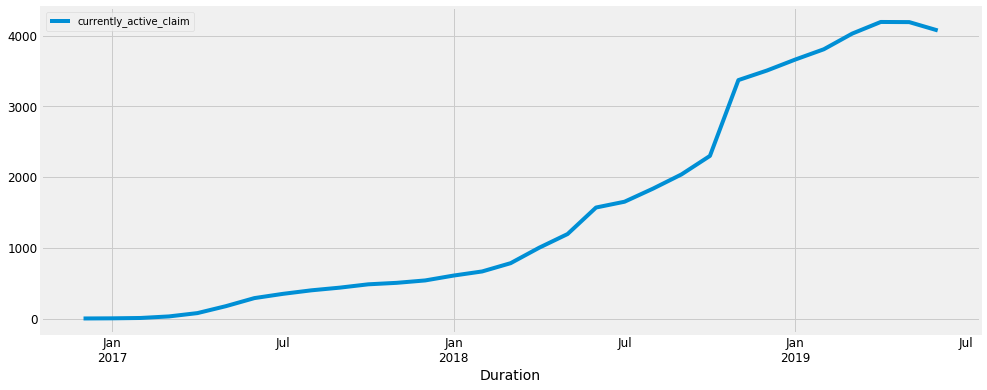

In [10]:
#plot
current_claim.plot(figsize=(15, 6))
current_claim

In [11]:
#test stationarity duction
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

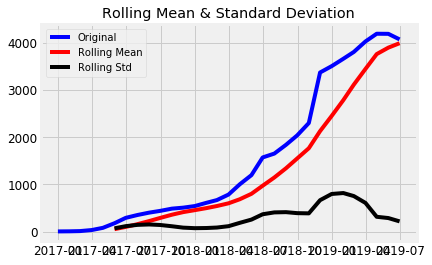

In [12]:
#checking current claim stationarity
test_stationarity(current_claim)
matplotlib.rcParams['figure.figsize'] = 10,6

,currently_active_claim
Duration,
2016-12-31,0.693147
2017-01-31,1.386294
2017-02-28,2.197225
2017-03-31,3.433987
2017-04-30,4.356709
2017-05-31,5.170484
2017-06-30,5.669881
2017-07-31,5.857933
2017-08-31,5.991465


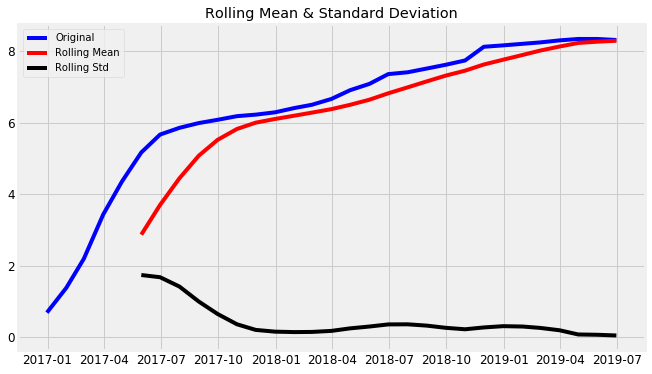

In [13]:
#date is not stationary as mean and std is varying with the time period
#making it stationary using log tranformation and checking its stationarity
current_claim_logscale=np.log(current_claim)
test_stationarity(current_claim_logscale)
matplotlib.rcParams['figure.figsize'] = 10,6
current_claim_logscale

,currently_active_claim
Duration,
2016-12-31,1.414214
2017-01-31,2.000000
2017-02-28,3.000000
2017-03-31,5.567764
2017-04-30,8.831761
2017-05-31,13.266499
2017-06-30,17.029386
2017-07-31,18.708287
2017-08-31,20.000000


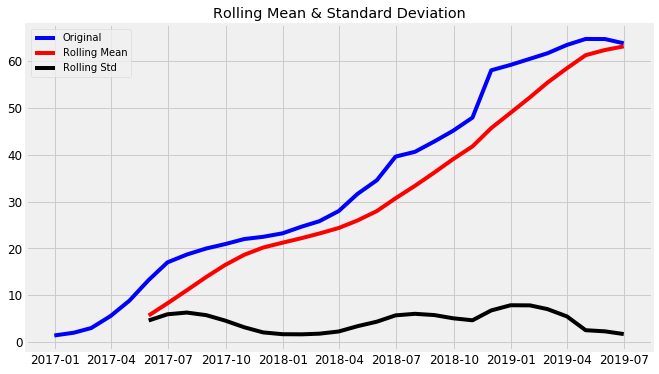

In [14]:
#now trying sqroot transformation and checking its stationarity
from scipy.stats import boxcox
current_claim_sqrt=np.sqrt(current_claim)
test_stationarity(current_claim_sqrt)
matplotlib.rcParams['figure.figsize'] = 10,6
current_claim_sqrt

Lambda: 0.317879


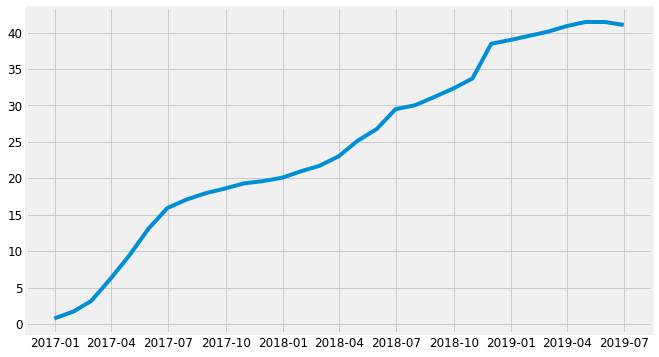

In [15]:
#boxcox transformation to automatically optimize 
current_claim['currently_active_claim'], lam = boxcox(current_claim['currently_active_claim'])
print('Lambda: %f' % lam)
plt.plot(current_claim['currently_active_claim'])

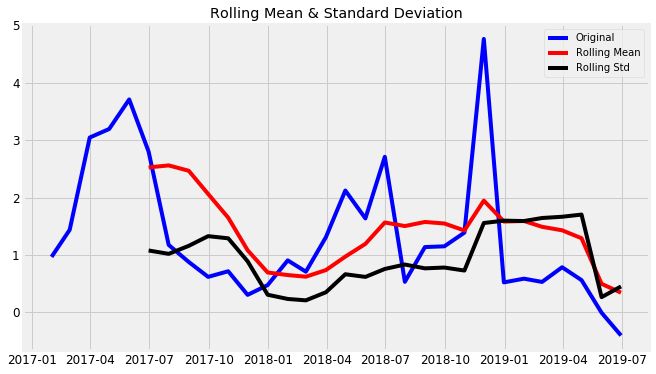

In [16]:
#checking for the d value in arima model
current_claim_diff =current_claim - current_claim.shift()
test_stationarity(current_claim_diff)

In [17]:
#adf test for stationarity
current_claim_diff=current_claim_diff.dropna()
result=adfuller(current_claim_diff['currently_active_claim'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.080218
p-value: 0.028052
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


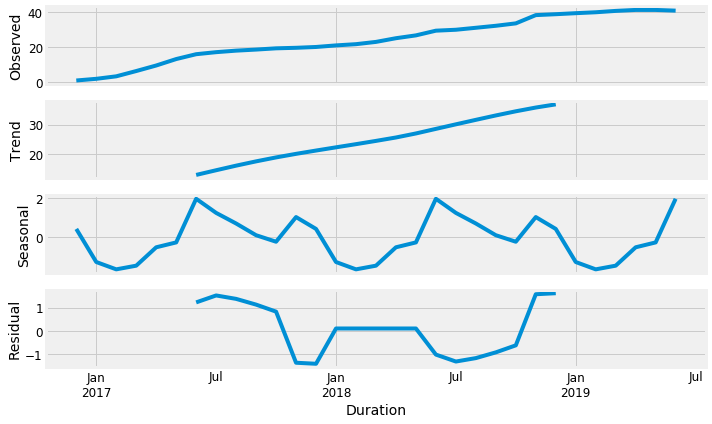

In [18]:
#current_claim_diff time series is stationary as p-value is less than 5%
# decomposition
decomposition = sm.tsa.seasonal_decompose(current_claim, model='additive')
fig = decomposition.plot()
plt.show()


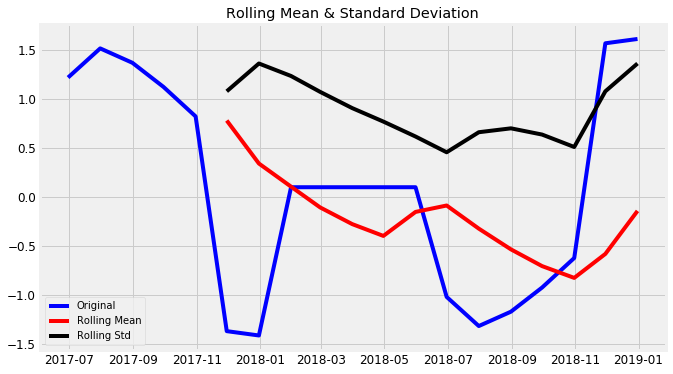

In [19]:
#stationarity of residual data
decomposed_data=decomposition.resid
test_stationarity(decomposed_data)

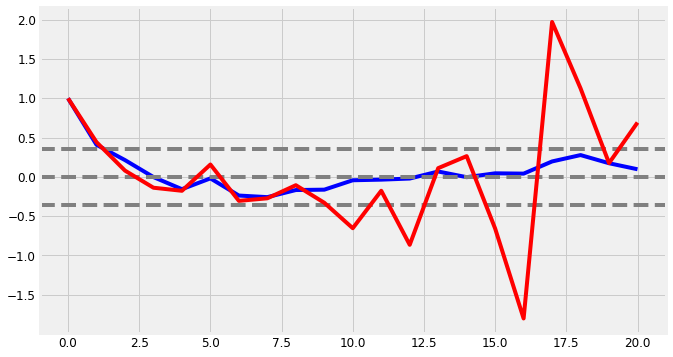

In [20]:
#acf and pacf graph for p and q value in arima model
lag_acf=acf(current_claim_diff,nlags=20)
lag_pacf=pacf(current_claim_diff,nlags=20,method='ols')
plt.plot(lag_acf,color='blue',label='acf')
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(current_claim_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(current_claim_diff)),linestyle='--',color='grey')
plt.plot(lag_pacf,color='red', label='pacf')



In [81]:
# d=1, p=3 and q=2 is the best fittted arima model 
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(current_claim,order=(3,1,2))

C:\Users\Sagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


C:\Users\Sagar\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'rss:23.6547')

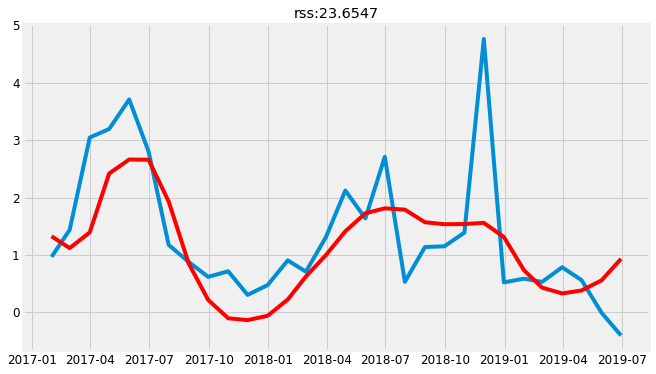

In [82]:
#arima model applied
result_AR=model.fit(disp=5)
plt.plot(current_claim_diff)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('rss:%.4f'%sum((result_AR.fittedvalues-current_claim_diff['currently_active_claim'])**2))

In [83]:
#getting the model fitted value 
prediction_ar_diff=pd.Series(result_AR.fittedvalues,copy=True)
print(prediction_ar_diff)

Duration
2017-01-31    1.325904
2017-02-28    1.119723
2017-03-31    1.392675
2017-04-30    2.418395
2017-05-31    2.663544
2017-06-30    2.659049
2017-07-31    1.931432
2017-08-31    0.850516
2017-09-30    0.217481
2017-10-31   -0.103162
2017-11-30   -0.135037
2017-12-31   -0.059100
2018-01-31    0.223316
2018-02-28    0.623618
2018-03-31    0.997895
2018-04-30    1.412204
2018-05-31    1.726169
2018-06-30    1.812663
2018-07-31    1.789483
2018-08-31    1.570678
2018-09-30    1.535556
2018-10-31    1.538637
2018-11-30    1.559510
2018-12-31    1.312779
2019-01-31    0.734208
2019-02-28    0.431225
2019-03-31    0.329557
2019-04-30    0.380872
2019-05-31    0.558072
2019-06-30    0.931011
dtype: float64


In [84]:
#inversing the shift
prediction_ar_diff_cumsum=prediction_ar_diff.cumsum()
print(prediction_ar_diff_cumsum)

Duration
2017-01-31     1.325904
2017-02-28     2.445627
2017-03-31     3.838302
2017-04-30     6.256697
2017-05-31     8.920241
2017-06-30    11.579290
2017-07-31    13.510722
2017-08-31    14.361238
2017-09-30    14.578719
2017-10-31    14.475557
2017-11-30    14.340520
2017-12-31    14.281420
2018-01-31    14.504736
2018-02-28    15.128354
2018-03-31    16.126249
2018-04-30    17.538453
2018-05-31    19.264622
2018-06-30    21.077285
2018-07-31    22.866768
2018-08-31    24.437446
2018-09-30    25.973002
2018-10-31    27.511639
2018-11-30    29.071149
2018-12-31    30.383928
2019-01-31    31.118136
2019-02-28    31.549360
2019-03-31    31.878917
2019-04-30    32.259789
2019-05-31    32.817861
2019-06-30    33.748871
dtype: float64


In [85]:
prediction_arima_boxcox=pd.Series(current_claim['currently_active_claim'].ix[0],index=current_claim.index)
prediction_arima_boxcox=prediction_arima_boxcox.add(prediction_ar_diff_cumsum,fill_value=0)
print(prediction_arima_boxcox)

Duration
2016-12-31     0.775442
2017-01-31     2.101346
2017-02-28     3.221069
2017-03-31     4.613744
2017-04-30     7.032139
2017-05-31     9.695683
2017-06-30    12.354732
2017-07-31    14.286163
2017-08-31    15.136680
2017-09-30    15.354160
2017-10-31    15.250998
2017-11-30    15.115962
2017-12-31    15.056862
2018-01-31    15.280177
2018-02-28    15.903795
2018-03-31    16.901691
2018-04-30    18.313895
2018-05-31    20.040063
2018-06-30    21.852727
2018-07-31    23.642210
2018-08-31    25.212888
2018-09-30    26.748443
2018-10-31    28.287081
2018-11-30    29.846591
2018-12-31    31.159370
2019-01-31    31.893578
2019-02-28    32.324802
2019-03-31    32.654359
2019-04-30    33.035231
2019-05-31    33.593303
2019-06-30    34.524313
dtype: float64


In [86]:
#inverse the boxcox transformation
def invboxcox(y,ld):
   if ld == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(ld*y+1)/ld))

In [87]:
#fitted model value
prediction_arima=invboxcox(prediction_arima_boxcox,0.317879)
prediction_arima

Duration
2016-12-31       2.000000
2017-01-31       5.000048
2017-02-28       9.188234
2017-03-31      17.119495
2017-04-30      40.192450
2017-05-31      83.509048
2017-06-30     150.954998
2017-07-31     218.416022
2017-08-31     253.727869
2017-09-30     263.344511
2017-10-31     258.752434
2017-11-30     252.824458
2017-12-31     250.259426
2018-01-31     260.045705
2018-02-28     288.751014
2018-03-31     339.062908
2018-04-30     420.032089
2018-05-31     535.774453
2018-06-30     678.927235
2018-07-31     843.879587
2018-08-31    1009.547092
2018-09-30    1191.711026
2018-10-31    1395.531877
2018-11-30    1625.158274
2018-12-31    1837.403250
2019-01-31    1963.976282
2019-02-28    2041.021292
2019-03-31    2101.273048
2019-04-30    2172.404705
2019-05-31    2279.570881
2019-06-30    2466.285560
dtype: float64

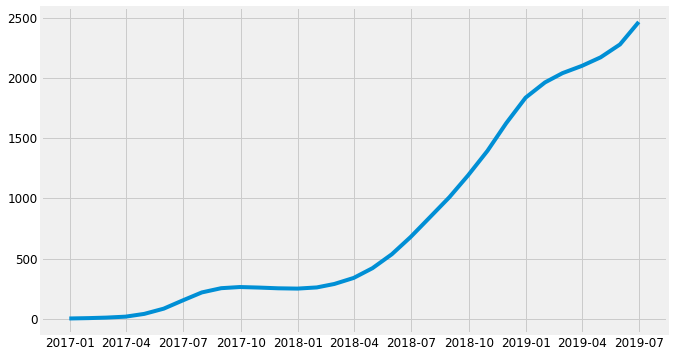

In [88]:
#fitted model plot
plt.plot(prediction_arima)

array([42.71680918, 44.98808964, 47.62665353, 50.34547194, 52.85404463,
       54.91832058, 56.40634465, 57.31081213, 57.74493098, 57.91365201,
       58.06730719, 58.44800021])

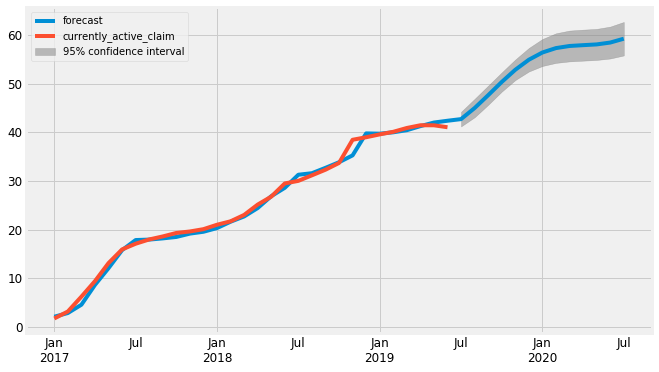

In [94]:
#plot and values of forecast for next year 
result_AR.plot_predict(1,43)
x=result_AR.forecast(12)
x[0]

In [96]:
#inverse boxcox forecast value
forecast values
year_forecast=invboxcox(x[0],0.317879)
year_forecast

array([ 4580.29272953,  5332.50775712,  6307.298983  ,  7432.10598543,
        8584.72786387,  9620.16475349, 10417.27139834, 10923.15160959,
       11171.80410208, 11269.47602398, 11358.93170998, 11582.64969768])